# Lending Club Loan Data Analysis

# Description

## Create a model that predicts whether or not a loan will be default using the historical data.

 

## Problem Statement:  

### For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

# Steps to perform:

### Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

## Tasks:

### 1.     Feature Transformation
  
   ###      a. Transform categorical values into numerical values (discrete)

### 2.     Exploratory data analysis of different factors of the dataset.

### 3.     Additional Feature Engineering

   ###      a. You will check the correlation between features and will drop those features which have a strong         correlation

   ###      b.This will help reduce the number of features and will leave you with the most relevant features

### 4.     Modeling
 
   ###      a. After applying EDA and feature engineering, you are now ready to build the predictive models

   ###      b. In this part, you will create a deep learning model using Keras with Tensorflow backend

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import  seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout




In [2]:
data = pd.read_csv('loan_data.csv')

In [3]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [5]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
label_encoder = LabelEncoder()
data['purpose'] = label_encoder.fit_transform(data['purpose'])

In [8]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [9]:
data.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

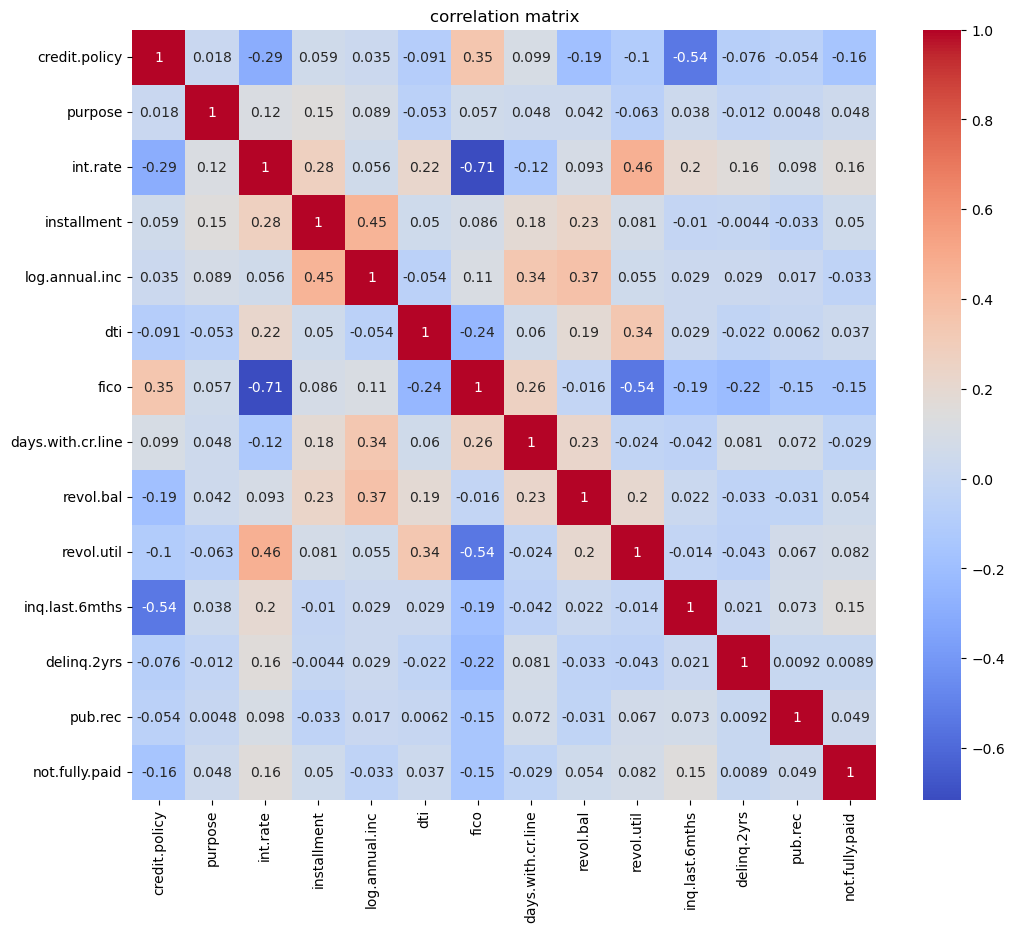

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [11]:


correlation_matrix= data.corr().abs()
upper_tri=correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool_))
drop = [column for column in upper_tri.columns if any (upper_tri[column]>.7)]



In [12]:
drop

['fico']

In [13]:
data.drop(drop,axis=1, inplace =  True)

In [14]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,1800.000000,0,3.2,5,0,0,1


In [15]:
X= data.drop('credit.policy',axis =1)
y=  data['credit.policy']

In [16]:
X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  =  scaler.transform(X_test)

In [18]:
print("Dimesnion of  X_train :",X_train.shape)
print("Dimension of  X_test :-", X_test.shape)


Dimesnion of  X_train : (7662, 12)
Dimension of  X_test :- (1916, 12)


In [19]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification


In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))  # Adjust hyperparameters


Epoch 1/100
240/240 [==============================] - 2s 3ms/step - loss: 0.3398 - accuracy: 0.8662 - val_loss: 0.2670 - val_accuracy: 0.8967
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2680 - accuracy: 0.8982 - val_loss: 0.2455 - val_accuracy: 0.9076
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2544 - accuracy: 0.8995 - val_loss: 0.2417 - val_accuracy: 0.9092
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2395 - accuracy: 0.9054 - val_loss: 0.2370 - val_accuracy: 0.9076
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2317 - accuracy: 0.9126 - val_loss: 0.2256 - val_accuracy: 0.9170
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2298 - accuracy: 0.9086 - val_loss: 0.2244 - val_accuracy: 0.9201
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2227 - accuracy: 0.9114 - val_loss: 0.2154 - val_accuracy: 0.9191

Epoch 58/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1241 - accuracy: 0.9491 - val_loss: 0.1698 - val_accuracy: 0.9368
Epoch 59/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1237 - accuracy: 0.9517 - val_loss: 0.1652 - val_accuracy: 0.9442
Epoch 60/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1267 - accuracy: 0.9522 - val_loss: 0.1642 - val_accuracy: 0.9374
Epoch 61/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1220 - accuracy: 0.9507 - val_loss: 0.1765 - val_accuracy: 0.9400
Epoch 62/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1204 - accuracy: 0.9513 - val_loss: 0.1652 - val_accuracy: 0.9410
Epoch 63/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1228 - accuracy: 0.9499 - val_loss: 0.1692 - val_accuracy: 0.9384
Epoch 64/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1217 - accuracy: 0.9525 - val_loss: 0.1652 - val_accuracy:

In [22]:
# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

60/60 [==============================] - 0s 943us/step - loss: 0.1748 - accuracy: 0.9379
Test loss: 0.17482060194015503
Test accuracy: 0.93789142370224


###  Submitted by - Divyansh Shivhare